### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

# Project 1 - submission for Lizette Brown

#### 1. Import the necessary packages - 2.5 marks

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [45]:
# Reading dataset 'Data' into a dataframe named 'df_data' and show the first 5 rows to see what the data looks like
df_data = pd.read_csv("Data.csv")
df_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [46]:
# Reading dataset 'user' into a dataframe named 'df_user' and show the first 5 rows to see what the data looks like
df_user = pd.read_csv("user.csv")
df_user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [47]:
# Reading dataset 'item' into a dataframe named 'df_item' and show the first 5 rows to see what the data looks like
df_item = pd.read_csv("item.csv")
df_item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [48]:
# Obtain the required information (i.e. shape, info and describe) for dataframe 'Data'
df_data.shape
df_data.info()
df_data.describe()
pd.DataFrame( df_data.isnull().sum(), columns= ['Number of missing values'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


,Number of missing values
user id,0
movie id,0
rating,0
timestamp,0


In [49]:
# Obtain the required information for dataframe 'User'
df_user.info()
df_user.shape
df_user.describe()
pd.DataFrame( df_user.isnull().sum(), columns= ['Number of missing values'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


,Number of missing values
user id,0
age,0
gender,0
occupation,0
zip code,0


In [50]:
# Obtain the required information for dataframe 'Item'
df_item.info()
df_item.shape
df_item.describe()
pd.DataFrame( df_item.isnull().sum(), columns= ['Number of missing values'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


,Number of missing values
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [51]:
# use sum on the default axis

#Create a copy of the dataframe, and delete the columns not related to genre
df2 = df_item.copy()
df2.drop(['movie id', 'movie title', 'release date'], axis=1, inplace=True)

#Create a table which shows the summed value per column (i.e. movie genre) 
pd.DataFrame(df2.sum(), columns= ['Number of movies per genre'])


,Number of movies per genre
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre - 2.5 marks

In [52]:
#hint: use sum on the axis = 1

#Create a copy of the dataframe, and delete the columns not related to genre
df2 = df_item.copy()
df2.drop(['movie id', 'release date'], axis=1, inplace=True)

df2['Number of genres'] = df2.sum(axis = 1, skipna = True)
df2[df2['Number of genres'] > 1]

,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number of genres
0,Toy Story,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,GoldenEye,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,Get Shorty,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,Copycat,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,3
6,Twelve Monkeys,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2
7,Babe,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,3
9,Richard III,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
10,Seven (Se7en),0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
11,"Usual Suspects, The",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
13,"Postino, Il",0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [44]:
df2[df2.unknown != 1]

,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number of genres
0,Toy Story,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,GoldenEye,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,Four Rooms,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,Get Shorty,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,Copycat,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,3
5,Shanghai Triad (Yao a yao yao dao waipo qiao),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,Twelve Monkeys,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2
7,Babe,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,3
8,Dead Man Walking,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,Richard III,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [53]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


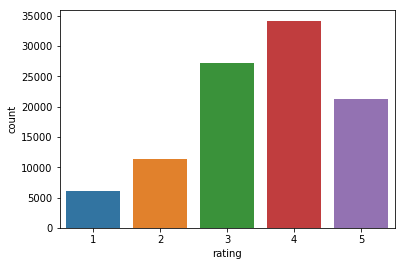

In [53]:
#Univariate plot for 'Rating'
sns.countplot(df_data['rating']);

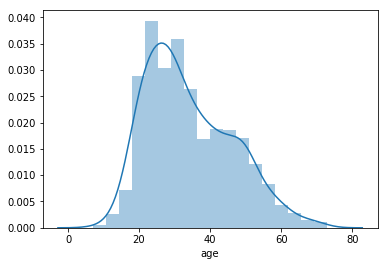

In [54]:
#Univariate plot for 'Age'
sns.distplot(df_user['age']);

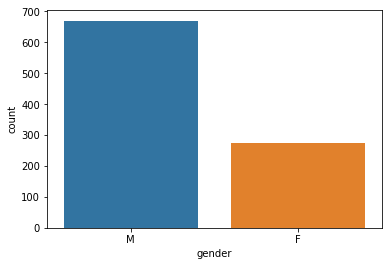

In [55]:
#Univariate plot for 'Gender'
sns.countplot(df_user['gender']);

[Text(0, 0, 'technician'),
 Text(0, 0, 'other'),
 Text(0, 0, 'writer'),
 Text(0, 0, 'executive'),
 Text(0, 0, 'administrator'),
 Text(0, 0, 'student'),
 Text(0, 0, 'lawyer'),
 Text(0, 0, 'educator'),
 Text(0, 0, 'scientist'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'programmer'),
 Text(0, 0, 'librarian'),
 Text(0, 0, 'homemaker'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'engineer'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'none'),
 Text(0, 0, 'healthcare'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'salesman'),
 Text(0, 0, 'doctor')]

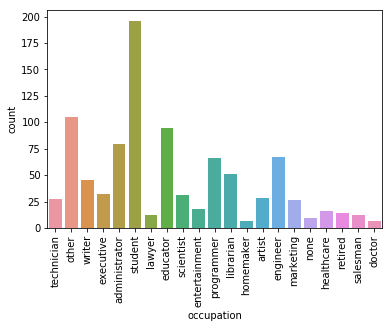

In [56]:
#Univariate plot for 'Occupation'
graph = sns.countplot(df_user['occupation'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)

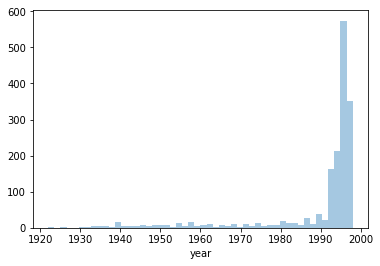

In [57]:
#Univariate plot for 'Release Year'
df_item['release date'] = pd.to_datetime(df_item['release date'])
df_item['year'] = df_item['release date'].dt.year
sns.distplot(df_item['year'], kde=False);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

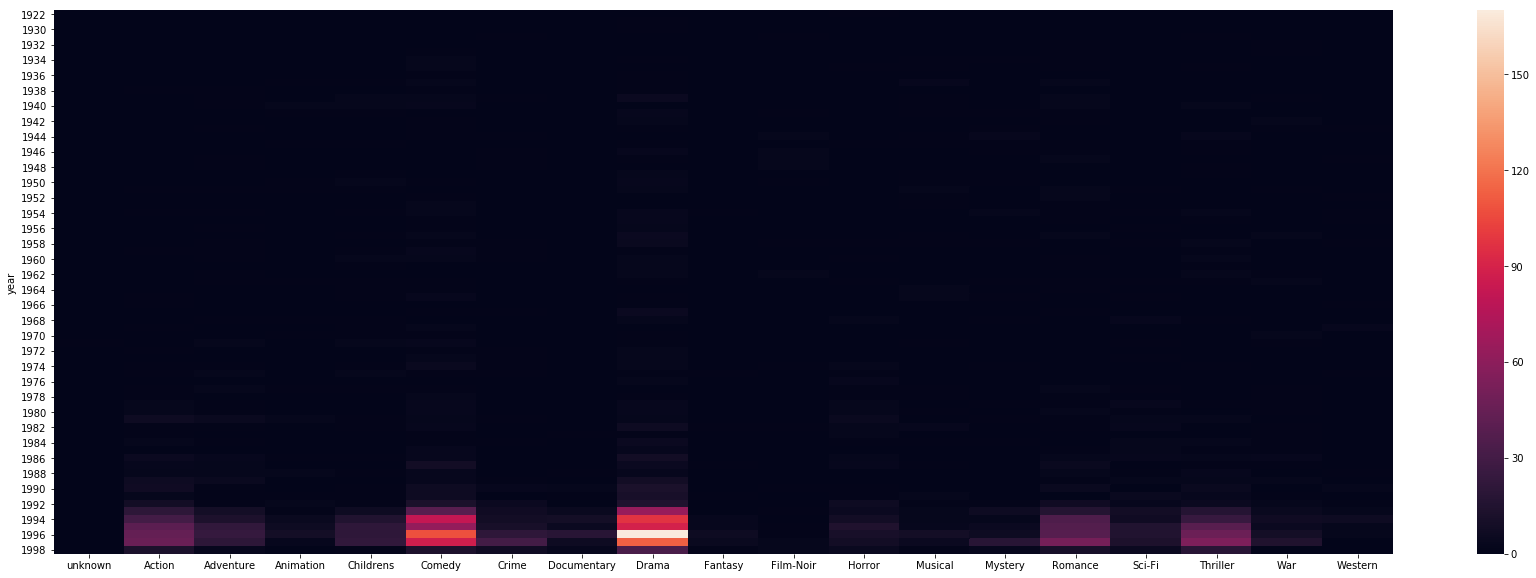

In [83]:
#Create a copy of the dataframe, and delete the columns not related to genre
df2 = df_item.copy()
df2.drop(['movie id', 'movie title', 'release date'], axis=1, inplace=True)

#Create a table which shows the summed value per column (i.e. movie genre) 

df3 = pd.DataFrame(df2.groupby(['year']).sum())
df3

plt.figure(figsize=(30,10))
sns.heatmap(df3)
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [26]:
#keep only specific columns from dataframe 'Data'
selected_columns = df_data[["movie id","rating"]]
new_ratings = selected_columns.copy()
new_ratings

#keep only specific columns from dataframe 'Item'
selected_columns = df_item[["movie id","movie title"]]
new_titles = selected_columns.copy()
new_titles

#merge the two dataframes
new_ratings = pd.merge(new_ratings,new_titles,how='left',on='movie id')
new_ratings

#Identify movies with more than 100 ratings
df_new = new_ratings.groupby('movie title').count()[['rating']]
df_new = df_new[df_new['rating'] > 100]

#Copy the movie names into a list
list = (df_new.index.tolist())
len(list)

#Limit the merged dataset to the movies which adhers to the rating requirements (i.e. appears in list)
merged = new_ratings[new_ratings['movie title'].isin(list)]

#Calculate the total rating per movie title
total_score= merged.groupby('movie title').mean()[['rating']]
total_score = total_score.sort_values(by ='rating', ascending=False )

#Create a new dataframe with the 25 movies with highest average rating
top_25 = total_score.head(25)
top_25


,rating
movie title,
"Close Shave, A",4.491071
Schindler's List,4.466443
"Wrong Trousers, The",4.466102
Casablanca,4.456790
"Shawshank Redemption, The",4.445230
Rear Window,4.387560
"Usual Suspects, The",4.385768
Star Wars,4.358491
12 Angry Men,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [43]:
#keep only specific columns from dataframe 'Data'
selected_columns = df_data[["movie id","user id", "rating"]]
df_movies = selected_columns.copy()
df_movies

#keep only specific columns from dataframe 'User'
selected_columns = df_user[["user id","gender"]]
gender = selected_columns.copy()
gender

#merge the two dataframes
combined = pd.merge(df_movies,gender,how='left',on='user id')
combined

#merge on dataframe'Item' to obtain genre information
total_data = pd.merge(combined,df_item,how='left',on='movie id')

#remove columns not required anymore
total_data.drop(['movie id', 'user id', 'rating'], axis=1, inplace=True)
total_data

#calculate the total number of ratings per gender across genres
summary= total_data.groupby('gender').sum()

#calculate the total number of ratings per gender
totals = summary.sum(axis=1)
totals

#calculate the % ratings per gender per genre
summary = summary.div(totals, axis = 0) 

#confirm that the % sum up to 1
summary["sum"] = summary.sum(axis=1)
summary


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum
gender,,,,,,,,,,,,,,,,,,,,
F,0.000000,0.101339,0.058491,0.018529,0.041563,0.150239,0.033407,0.003482,0.204987,0.006760,0.007169,0.022290,0.026852,0.024469,0.109085,0.048956,0.094710,0.040763,0.006909,1.0
M,0.000006,0.126802,0.066790,0.016427,0.031155,0.136980,0.039406,0.003594,0.181811,0.006225,0.008484,0.025931,0.022104,0.024741,0.085615,0.063574,0.105649,0.045372,0.009334,1.0


#Conclusion:
#Hypothesis 1: Men watch more drama than women

Based on the results obtained, this hypothesis is not correct as more women (20.5%) watch dramas then men (18%).



#Hypothesis 2: Women watch more Sci-Fi than men

Based on the results obtained, this hypothesis is not correct as more men (6%) watch sci-Fi then women (5%).

#Hypothesis 3: Men watch more Romance than women

Based on the results obtained, this hypothesis is not correct as more women (11%) watch romance then men (8.6%).